<h1 style="color:darkblue; font-size:36px;">📊 Projet Students Performance</h1>

<h3 style="color:gray; font-size:22px;">Étude des performances des étudiants aux examens</h3>

<p style="font-size:16px;">
<strong>Nom :</strong> Mohamed Aziz Khmiri & Mohamed Aziz Lakhal <br>
<strong>Filière :</strong> Big Data & Analyse de données <br>
<strong>Matière :</strong> Programmation Statistiques avec R <br>
<strong>Date :</strong> 10/05/2025
</p>

<hr style="height:2px; background-color:#ccc;">

<h3 style="color:#bb1823;font-size:25px;font-weight:bold">Importation des outils</h3>

In [4]:
library(tidyverse)  
library(data.table) 
library(ggplot2)
library(dplyr)
library(corrplot)

<h3 style="color:#bb1823;font-size:25px;font-weight:bold">Importation de dataset</h3>

In [6]:
df <- read_csv('StudentsPerformance.csv')

Parsed with column specification:
cols(
  gender = col_character(),
  `race/ethnicity` = col_character(),
  `parental level of education` = col_character(),
  lunch = col_character(),
  `test preparation course` = col_character(),
  `math score` = col_double(),
  `reading score` = col_double(),
  `writing score` = col_double()
)


In [8]:
# Affichage des informations sur le dataframe
glimpse(df)

Observations: 1,000
Variables: 8
$ gender                        <chr> "female", "female", "female", "male",...
$ `race/ethnicity`              <chr> "group B", "group C", "group B", "gro...
$ `parental level of education` <chr> "bachelor's degree", "some college", ...
$ lunch                         <chr> "standard", "standard", "standard", "...
$ `test preparation course`     <chr> "none", "completed", "none", "none", ...
$ `math score`                  <dbl> 72, 69, 90, 47, 76, 71, 88, 40, 64, 3...
$ `reading score`               <dbl> 72, 90, 95, 57, 78, 83, 95, 43, 64, 6...
$ `writing score`               <dbl> 74, 88, 93, 44, 75, 78, 92, 39, 67, 5...


In [10]:
# Affichage des premières lignes
head(df)

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


<h3 style="color:#bb1823;font-size:25px;font-weight:bold">Paramètres statistiques usuels</h3>

In [12]:
# Affichage de nombre des lignes et colones
dim(df)

[1] 1000    8

In [14]:
# Nombre de lignes dupliquées
sum(duplicated(df))  

[1] 0

In [16]:
# Somme des NA par colonne
colSums(is.na(df))  

gender              race/ethnicity 
                          0                           0 
parental level of education                       lunch 
                          0                           0 
    test preparation course                  math score 
                          0                           0 
              reading score               writing score 
                          0                           0

In [18]:
# voir le nombre des valeurs 0
colSums(df == 0, na.rm = TRUE)

gender              race/ethnicity 
                          0                           0 
parental level of education                       lunch 
                          0                           0 
    test preparation course                  math score 
                          0                           1 
              reading score               writing score 
                          0                           0

In [20]:
# math score moyen 
mean(df$`math score`, na.rm = TRUE)

[1] 66.089

In [22]:
# math score médian
median(df$`math score`, na.rm = TRUE)

[1] 66

In [24]:
# math score minimum
min(df$`math score`, na.rm = TRUE)

[1] 0

In [26]:
# math score maximum
max(df$`math score`, na.rm = TRUE)

[1] 100

In [28]:
# Distribution de fréquence de la variable 'math score'
prop.table(table(df$`math score`))


    0     8    18    19    22    23    24    26    27    28    29    30    32 
0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.002 0.001 0.003 0.002 0.003 
   33    34    35    36    37    38    39    40    41    42    43    44    45 
0.001 0.002 0.005 0.002 0.004 0.003 0.004 0.010 0.006 0.006 0.005 0.009 0.009 
   46    47    48    49    50    51    52    53    54    55    56    57    58 
0.011 0.011 0.011 0.017 0.015 0.011 0.018 0.024 0.018 0.018 0.009 0.018 0.025 
   59    60    61    62    63    64    65    66    67    68    69    70    71 
0.032 0.016 0.027 0.035 0.026 0.020 0.036 0.024 0.026 0.026 0.032 0.018 0.026 
   72    73    74    75    76    77    78    79    80    81    82    83    84 
0.018 0.027 0.025 0.021 0.021 0.024 0.014 0.022 0.017 0.022 0.018 0.008 0.011 
   85    86    87    88    89    90    91    92    93    94    95    96    97 
0.014 0.008 0.016 0.015 0.006 0.008 0.009 0.006 0.004 0.007 0.002 0.003 0.006 
   98    99   100 
0.003 0.003 0.007 

In [30]:
# Variance de la variable 'math score'
var(df$`math score`, na.rm = TRUE)

[1] 229.919

In [ ]:
# Ecart-type de la variable 'math score'
sd(df$`math score`, na.rm = TRUE)

In [32]:
# Table de statistiques descriptives incluant toutes les variables
summary(df)

    gender          race/ethnicity     parental level of education
 Length:1000        Length:1000        Length:1000                
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
                                                                  
                                                                  
                                                                  
    lunch           test preparation course   math score     reading score   
 Length:1000        Length:1000             Min.   :  0.00   Min.   : 17.00  
 Class :character   Class :character        1st Qu.: 57.00   1st Qu.: 59.00  
 Mode  :character   Mode  :character        Median : 66.00   Median : 70.00  
                                            Mean   : 66.09   Mean   : 69.17  
                                            3rd Qu.: 77.00   3rd Qu.: 79.00  
                                            Max.   :100.00   Ma

In [34]:
# IQR de la variable 'math score'
IQR(df$`math score`, na.rm = TRUE)

[1] 20

In [36]:
# IQR de la variable 'math score' calculé d'une autre façon
quantile(df$`math score`, 0.75, na.rm = TRUE) - quantile(df$`math score`, 0.25, na.rm = TRUE)

75% 
 20

<h3 style="color:#bb1823;font-size:25px;font-weight:bold">Graphiques basiques pour decrire une variable</h3>

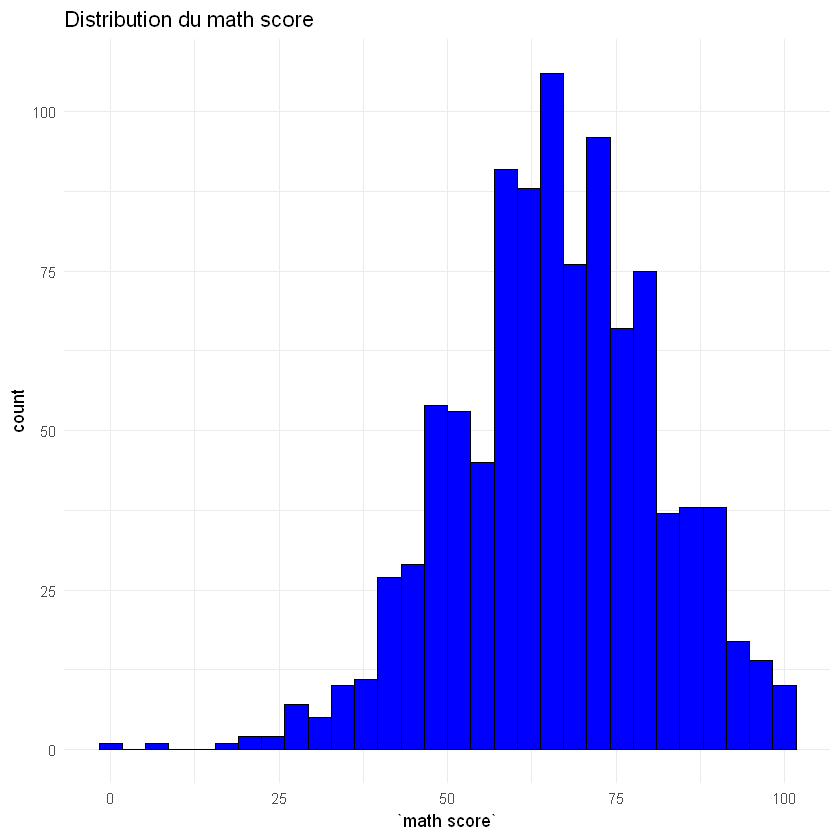

In [38]:
# Histogramme du math score
ggplot(df, aes(x = `math score`)) +
  geom_histogram(fill = "blue", color = "black", bins = 30) +
  ggtitle("Distribution du math score") +
  theme_minimal()

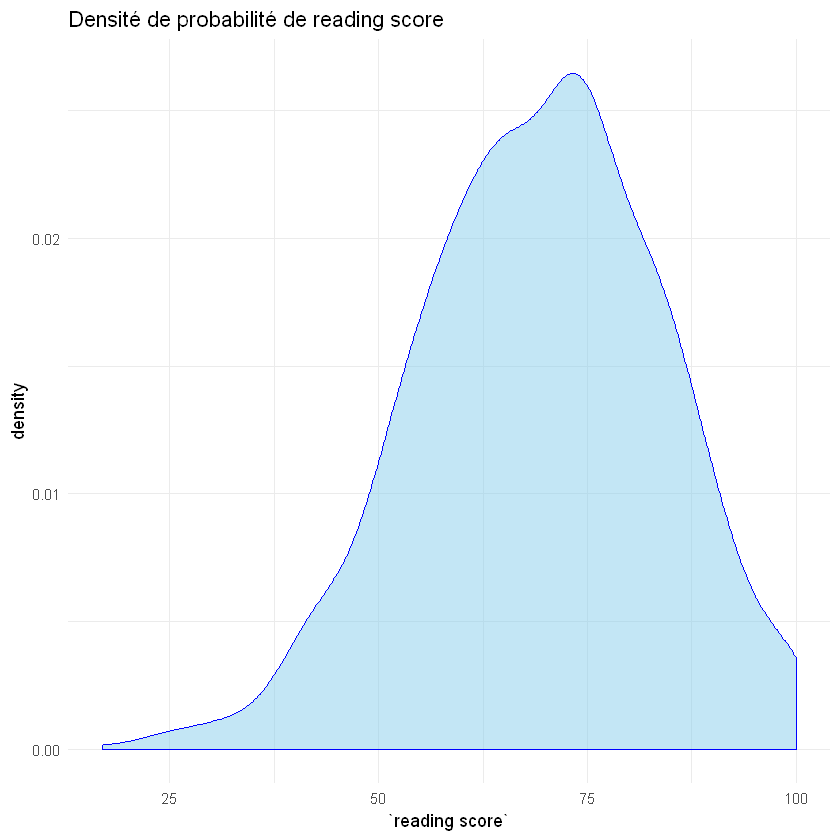

In [40]:
# Densité de probabilité du reading score
ggplot(df, aes(x = `reading score`)) +
  geom_density(fill = "skyblue", alpha = 0.5, color = "blue") + 
  ggtitle("Densité de probabilité de reading score") +
  theme_minimal()

In [42]:
# une fonction de détermination des outliers :
finding_outliers <- function(data, variable_name) {
  
  # Calcul de l'IQR
  iqr_value <- IQR(data[[variable_name]], na.rm = TRUE)
  
  # Calcul des bornes
  q1 <- quantile(data[[variable_name]], 0.25, na.rm = TRUE)
  q3 <- quantile(data[[variable_name]], 0.75, na.rm = TRUE)
  
  lower_bound <- q1 - 1.5 * iqr_value
  upper_bound <- q3 + 1.5 * iqr_value
  
  # Filtrage des outliers
  outliers <- data[data[[variable_name]] < lower_bound | data[[variable_name]] > upper_bound, ]
  
  return(outliers)
}

In [44]:
# Points de données aberrants de la variable writing score
outliers_df <- finding_outliers(df, "writing score")
head(outliers_df)

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
female,group C,some high school,free/reduced,none,0,17,10
male,group E,some high school,standard,none,30,26,22
male,group A,some college,free/reduced,none,28,23,19
male,group B,high school,free/reduced,none,30,24,15
female,group B,high school,free/reduced,none,8,24,23


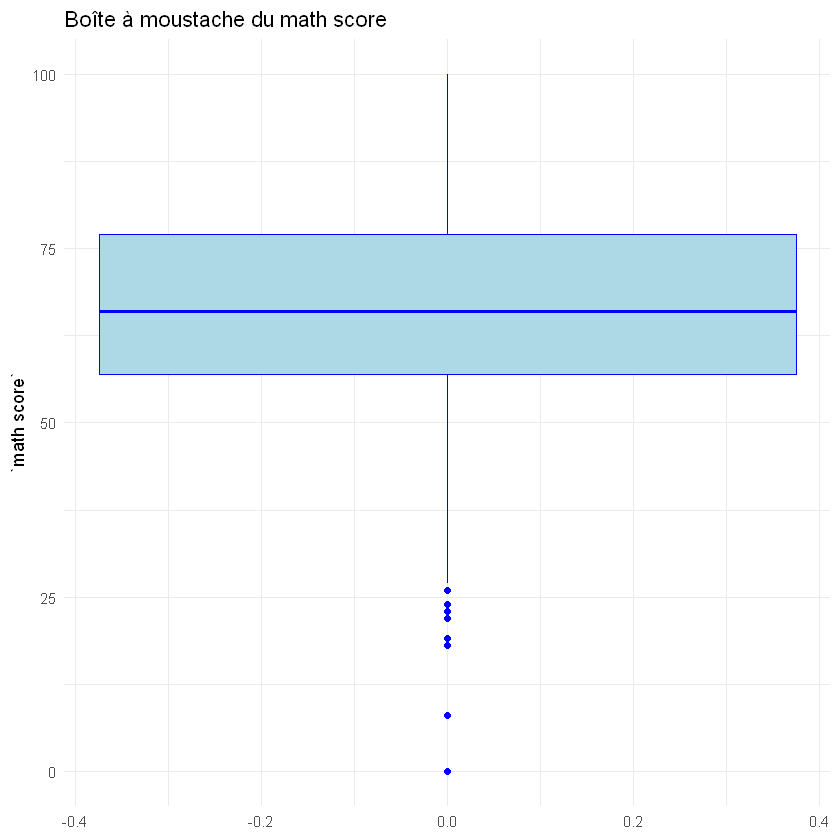

In [46]:
# Boîte à moustache du math score
ggplot(df, aes(y = `math score`)) + 
  geom_boxplot(fill = "lightblue", color = "blue") +
  ggtitle("Boîte à moustache du math score") +
  theme_minimal()

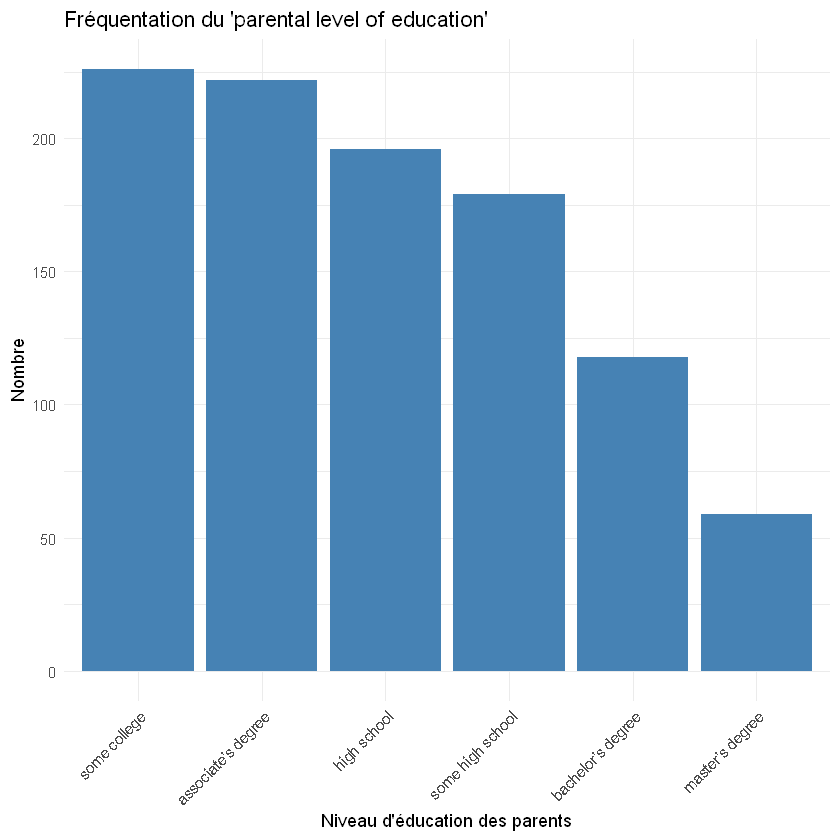

In [48]:
# Diagramme à barre de la variable 'parental level of education'
# Compter les occurrences et trier
df_counts <- df %>%
  count(`parental level of education`) %>%
  arrange(desc(n))

# Diagramme à barres
ggplot(df_counts, aes(x = reorder(`parental level of education`, -n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Fréquentation du 'parental level of education'",
       x = "Niveau d'éducation des parents",
       y = "Nombre") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(limits = df_counts$`parental level of education`)

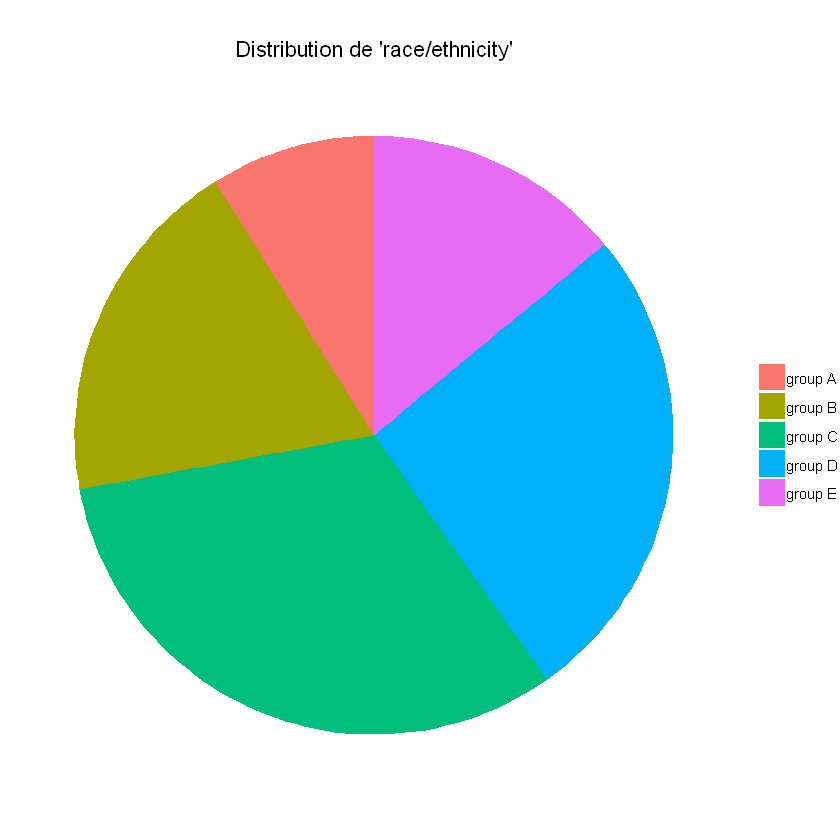

In [50]:
# Diagramme circulaire de la variable 'race/ethnicity' par la biblio ggplot2
ggplot(df, aes(x = "", fill = `race/ethnicity`)) +
  geom_bar(width = 1) +
  coord_polar("y") +
  ggtitle("Distribution de 'race/ethnicity'") +
  theme_void() +
  theme(legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5))

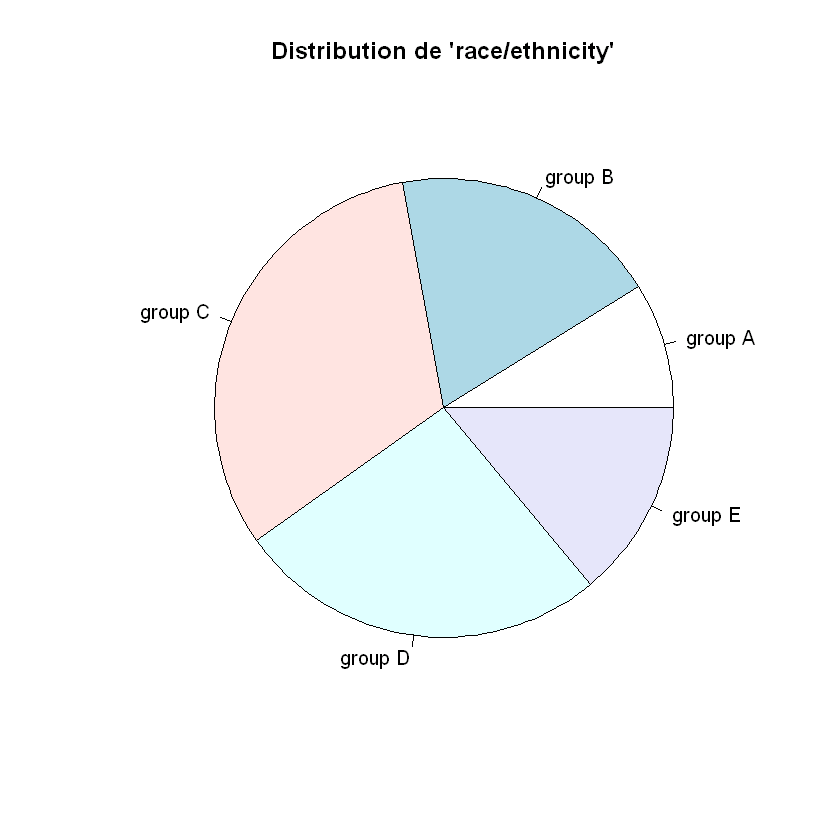

In [52]:
# Diagramme circulaire de la variable 'race/ethnicity' par base R
pie(table(df$`race/ethnicity`), 
    main = "Distribution de 'race/ethnicity'")

<h3 style="color:#bb1823;font-size:25px;font-weight:bold">Nuage de points et Coefficient de corrélation de Pearson</h3>

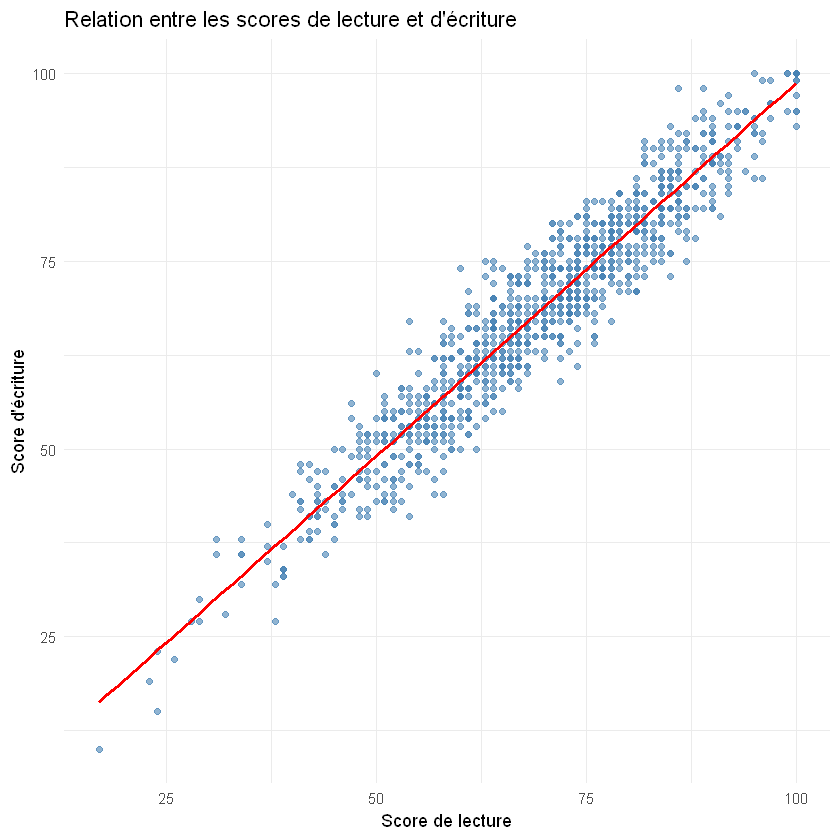

In [54]:
#  Relation entre la variable 'reading score' et la variable 'writing score'
ggplot(df, aes(x = `reading score`, y = `writing score`)) +
  geom_point(alpha = 0.6, color = "steelblue") +  
  geom_smooth(method = "lm", se = FALSE, color = "red") + 
  labs(title = "Relation entre les scores de lecture et d'écriture",
       x = "Score de lecture",
       y = "Score d'écriture") +
  theme_minimal()

In [56]:
# Coefficient de Pearson entre les variables 'reading score' et 'writing score'
cor.test(df$`reading score`, df$`writing score`, method = "pearson")


	Pearson's product-moment correlation

data:  df$`reading score` and df$`writing score`
t = 101.23, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9487506 0.9597921
sample estimates:
      cor 
0.9545981 


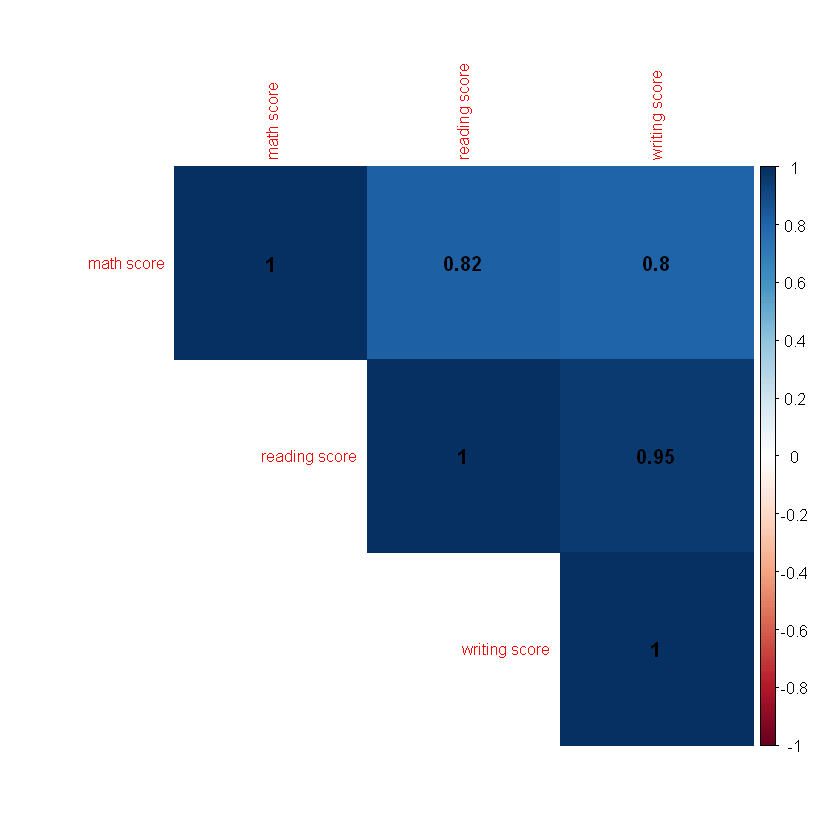

In [58]:
# Carte des corrélations
#Calcul de la matrice de corrélation
cor_matrix <- cor(df[, sapply(df, is.numeric)], use = "complete.obs")

#affichage
corrplot(cor_matrix, method = "color", type = "upper", 
         tl.cex = 0.8, addCoef.col = "black")

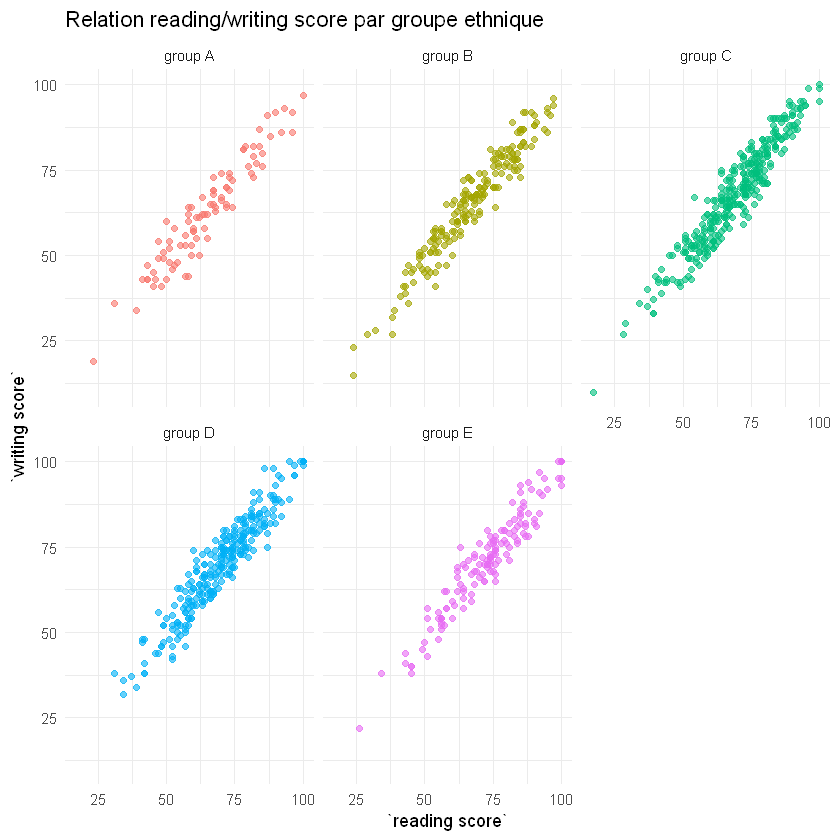

In [60]:
# Relation entre les variables 'reading score' et 'writing score' selon la race

ggplot(df, aes(x = `reading score`, y = `writing score`, color = `race/ethnicity`)) +
  geom_point(alpha = 0.6) +
  facet_wrap(~ `race/ethnicity`) +
  labs(title = "Relation reading/writing score par groupe ethnique") +
  theme_minimal() +
  theme(legend.position = "none")

In [62]:
# Coefficient de Pearson entre les variables 'reading score' et 'writing score' selon le genre
# Calcul pour les femmes
female_cor <- with(subset(df, gender == "female"), 
                  cor(`reading score`, `writing score`, use = "complete.obs"))

# Calcul pour les hommes
male_cor <- with(subset(df, gender == "male"), 
                cor(`reading score`, `writing score`, use = "complete.obs"))

# Affichage des résultats
cat("Female:", round(female_cor, 4), "\n")
cat("Male:", round(male_cor, 4), "\n")

Female: 0.9547 
Male: 0.9506 


<h3 style="color:#bb1823;font-size:25px;font-weight:bold">Densité de points 2D</h3>

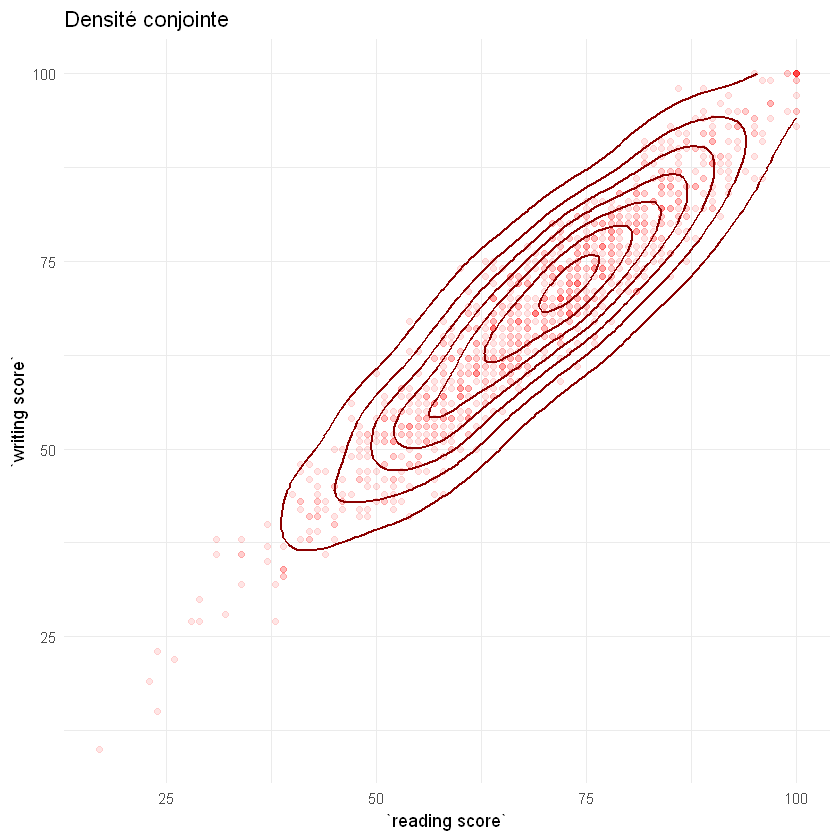

In [64]:
# Densité de points 2D entre les variables 'reading score' et 'writing score'
ggplot(df, aes(x = `reading score`, y = `writing score`)) +
  geom_point(alpha = 0.1, color = "red") +          
  geom_density_2d(color = "darkred", size = 0.8) +  
  labs(title = "Densité conjointe") +
  theme_minimal()

<h3 style="color:#bb1823;font-size:25px;font-weight:bold">RELATION ENTRE VARIABLES QUALITATIVES : TABLEAU DE CONTINGENCE</h3>

In [66]:
# Tableau de contingence entre les variables 'race/ethnicity' et 'parental level of education' normalisé dans les lignes 
result <- prop.table(
  table(`Race/Ethnicity` = df$`race/ethnicity`, 
        `Parental Education` = df$`parental level of education`),
  margin = 1
) * 100

round(result, 1)

              Parental Education
Race/Ethnicity associate's degree bachelor's degree high school master's degree
       group A               15.7              13.5        20.2             3.4
       group B               21.6              10.5        25.3             3.2
       group C               24.5              12.5        20.1             6.0
       group D               19.1              10.7        16.8             8.8
       group E               27.9              12.9        15.7             5.7
              Parental Education
Race/Ethnicity some college some high school
       group A         20.2             27.0
       group B         19.5             20.0
       group C         21.6             15.4
       group D         25.6             19.1
       group E         25.0             12.9

In [68]:
# Tableau de contingence entre les variables 'race/ethnicity' et 'parental level of education' selon le genre
result <- prop.table(
  table(
    `Gender` = df$gender,
    `Race/Ethnicity` = df$`race/ethnicity`,
    `Parent Education` = df$`parental level of education`
  ),
  margin = c(1, 2)  # Normalisation par genre ET race/ethnicity
) * 100 

round(result, 1)

, , Parent Education = associate's degree

        Race/Ethnicity
Gender   group A group B group C group D group E
  female    16.7    22.1    25.0    18.6    26.1
  male      15.1    20.9    23.7    19.5    29.6

, , Parent Education = bachelor's degree

        Race/Ethnicity
Gender   group A group B group C group D group E
  female     8.3    10.6    14.4    10.1    14.5
  male      17.0    10.5    10.1    11.3    11.3

, , Parent Education = high school

        Race/Ethnicity
Gender   group A group B group C group D group E
  female    19.4    26.9    16.7    13.2    17.4
  male      20.8    23.3    24.5    20.3    14.1

, , Parent Education = master's degree

        Race/Ethnicity
Gender   group A group B group C group D group E
  female     5.6     4.8     3.9    11.6    10.1
  male       1.9     1.2     8.6     6.0     1.4

, , Parent Education = some college

        Race/Ethnicity
Gender   group A group B group C group D group E
  female    22.2    14.4    24.4    27.1    23

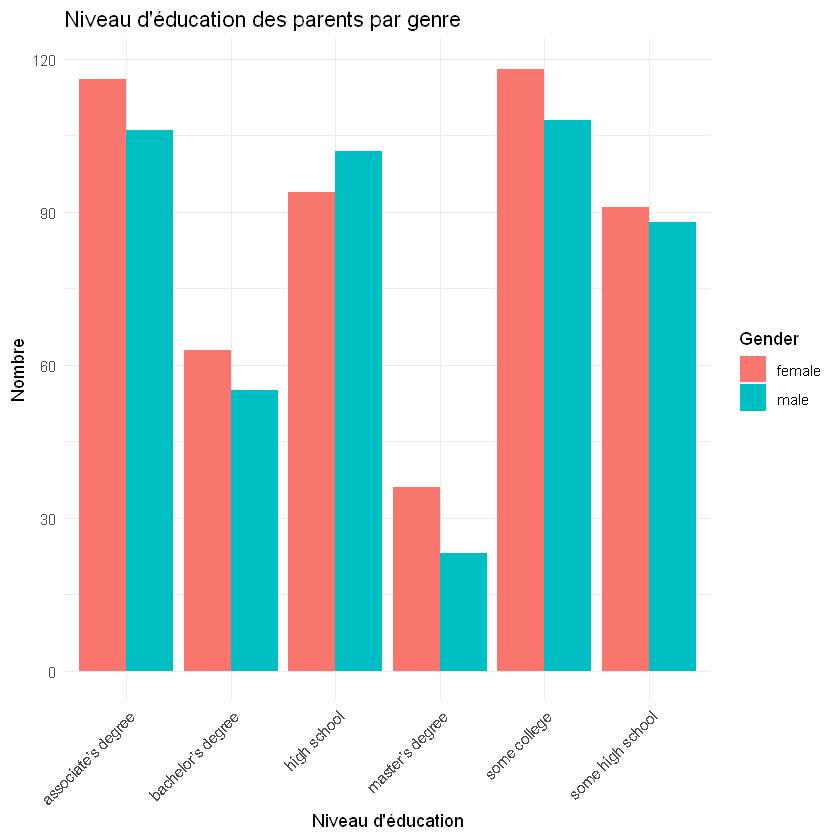

In [84]:
# Diagramme à barres montrant le niveau d'éducation des deux genres

ggplot(df, aes(x = `parental level of education`, fill = `gender`)) +
  geom_bar(position = position_dodge()) +
  labs(title = "Niveau d'éducation des parents par genre",
       x = "Niveau d'éducation",
       y = "Nombre",
       fill = "Gender") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

<h3 style="color:#bb1823;font-size:25px;font-weight:bold">RELATION ENTRE VARIABLES QUALITATIVES</h3>

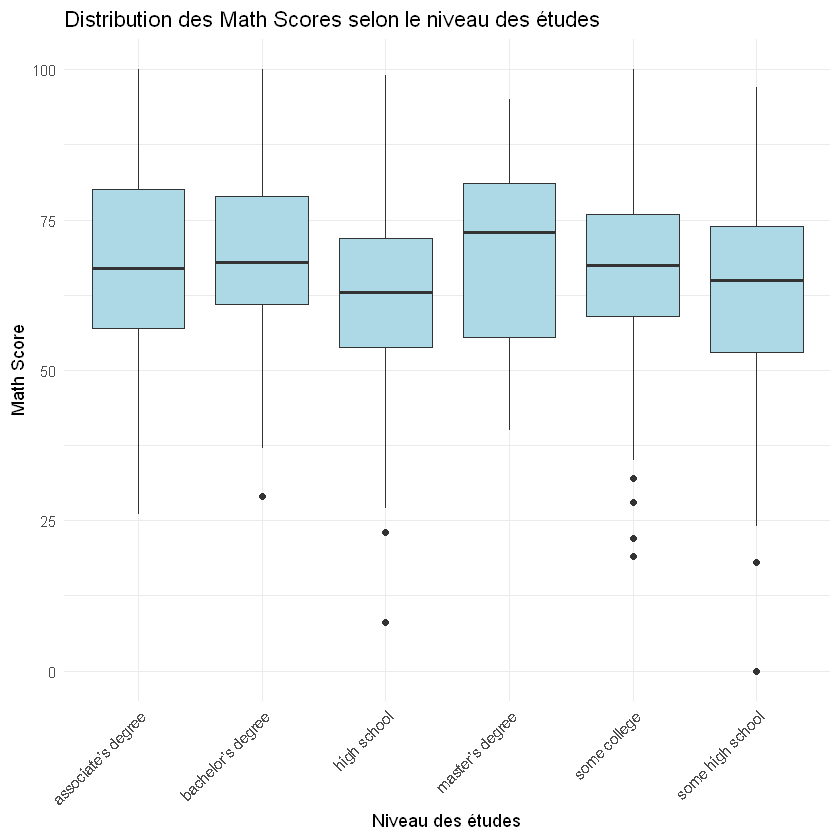

In [78]:
# Distribution des math scores selon le niveau des études

ggplot(df, aes(x = `parental level of education`, y = `math score`)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Distribution des Math Scores selon le niveau des études",
       x = "Niveau des études",
       y = "Math Score") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

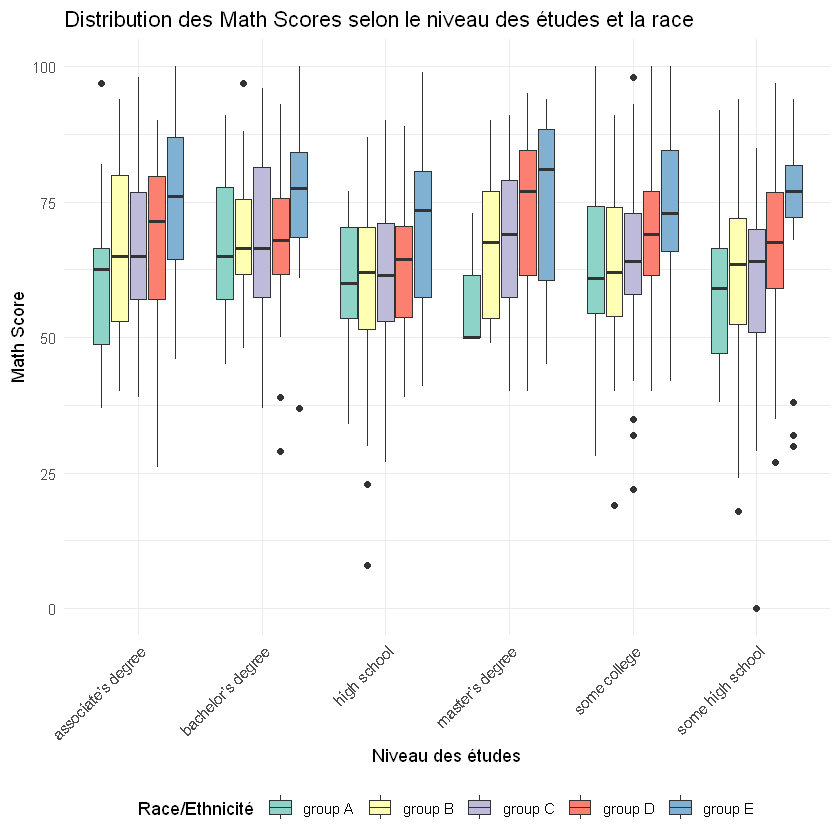

In [80]:
# Distribution des Math Scores selon le niveau des etudes et la race

ggplot(df, aes(x = `parental level of education`, 
               y = `math score`, 
               fill = `race/ethnicity`)) +
  geom_boxplot() +
  labs(title = "Distribution des Math Scores selon le niveau des études et la race",
       x = "Niveau des études",
       y = "Math Score",
       fill = "Race/Ethnicité") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "bottom") +
  scale_fill_brewer(palette = "Set3") 

Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()


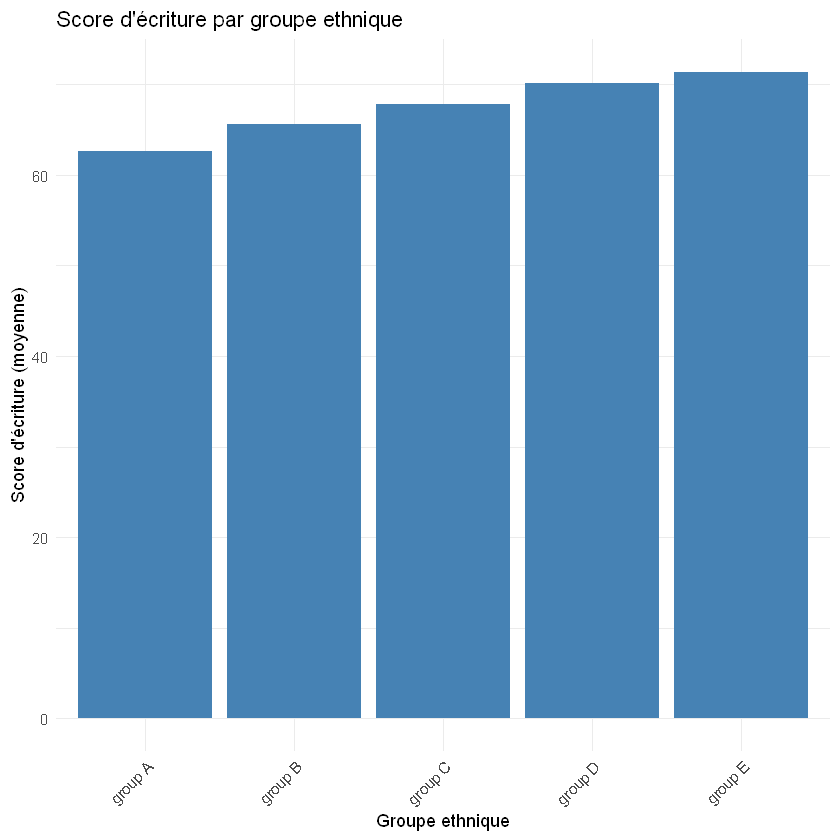

In [86]:
# writing score en fonction de la race

ggplot(df, aes(x = `race/ethnicity`, y = `writing score`)) +
  geom_bar(stat = "summary", fun = "mean", fill = "steelblue") + 
  labs(title = "Score d'écriture par groupe ethnique",
       x = "Groupe ethnique",
       y = "Score d'écriture (moyenne)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

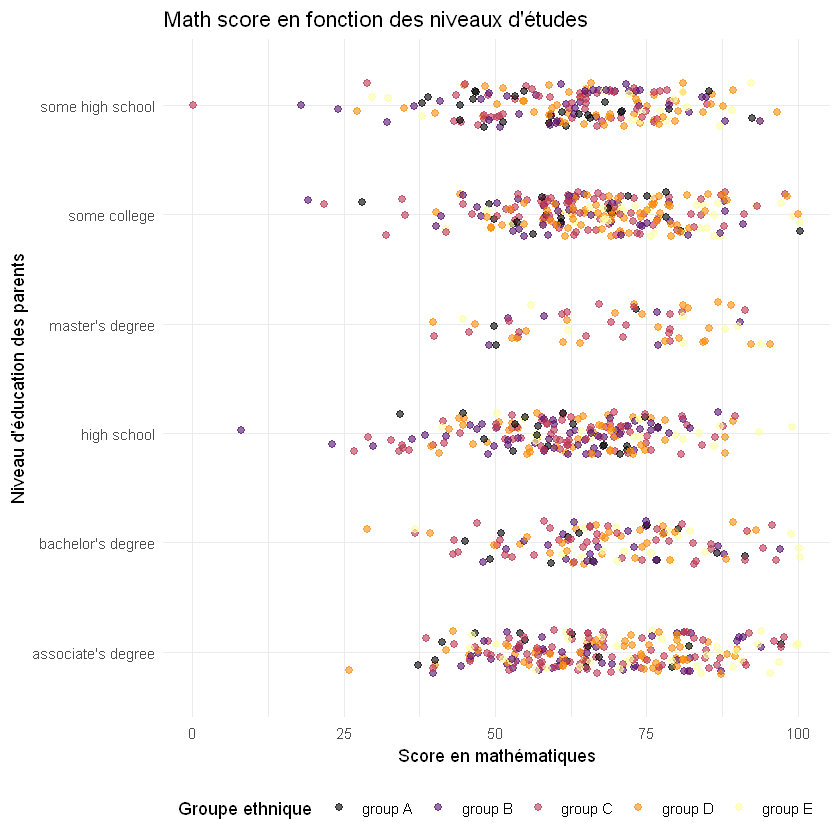

In [88]:
# voir le taux de math score en fonction des niveaux d'études

ggplot(df, aes(x = `math score`, 
               y = `parental level of education`, 
               color = `race/ethnicity`)) +
  geom_point(position = position_jitter(height = 0.2),  # just pour éviter le chevauchement
             alpha = 0.6, 
             size = 2) +
  scale_color_viridis_d(option = "B") + 
  labs(title = "Math score en fonction des niveaux d'études",
       x = "Score en mathématiques",
       y = "Niveau d'éducation des parents",
       color = "Groupe ethnique") +
  theme_minimal() +
  theme(legend.position = "bottom")

<h1 style="color:#464b8f;font-size:25px;font-weight:bold;font-size:70px">Analyse en Composantes Principales (ACP)</h1>

<h1 style="color:#bb1823;font-size:25px;font-weight:bold;font-size:50px">Préparation des données</h1>

In [90]:
# Sélectionner uniquement les variables numériques
df_numeric <- df[, sapply(df, is.numeric)]

# Standardisation des données
df_scaled <- scale(df_numeric)

<h1 style="color:#bb1823;font-size:25px;font-weight:bold;font-size:50px">Calcul de l'ACP</h1>

In [92]:
# Calculer l'ACP
pca_result <- prcomp(df_scaled, center = TRUE, scale. = TRUE)

# Résumé des résultats
summary(pca_result)

Importance of components:
                          PC1     PC2    PC3
Standard deviation     1.6488 0.48640 0.2121
Proportion of Variance 0.9061 0.07886 0.0150
Cumulative Proportion  0.9061 0.98500 1.0000

<h1 style="color:#bb1823;font-size:25px;font-weight:bold;font-size:50px">Visualisation</h1>

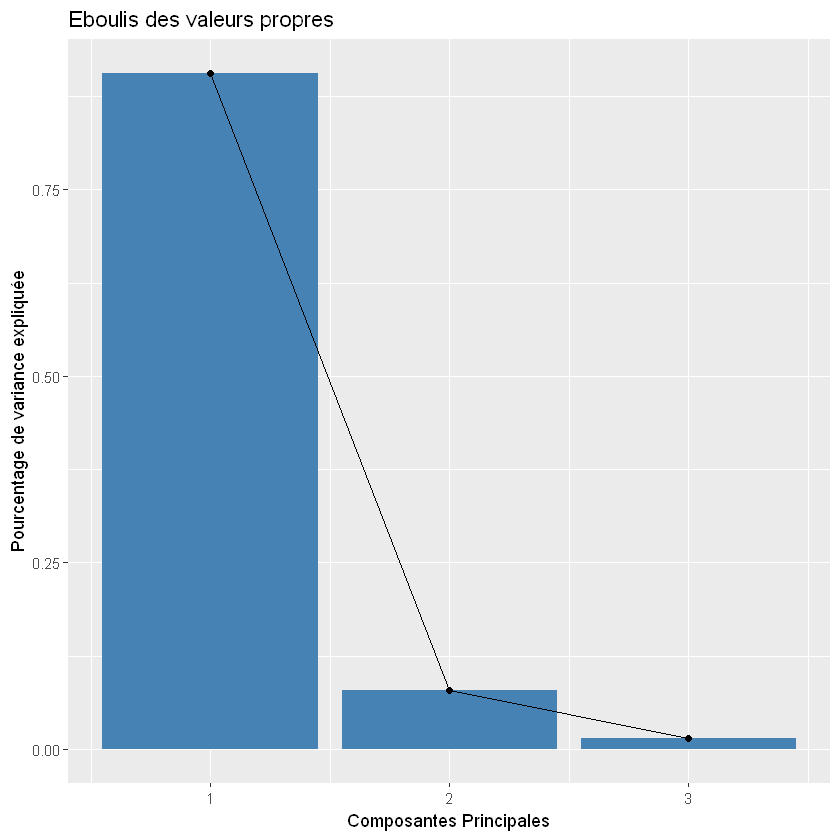

In [94]:
# Eboulis des valeurs propres
varexp <- pca_result$sdev^2 / sum(pca_result$sdev^2)

ggplot(data.frame(PC = 1:length(varexp), Variance = varexp[1:length(varexp)]),
       aes(x = PC, y = Variance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_line() +
  geom_point() +
  labs(title = "Eboulis des valeurs propres",
       x = "Composantes Principales",
       y = "Pourcentage de variance expliquée") +
  scale_x_continuous(breaks = 1:length(varexp))

Warning message:
"Ignoring unknown parameters: linewidth"

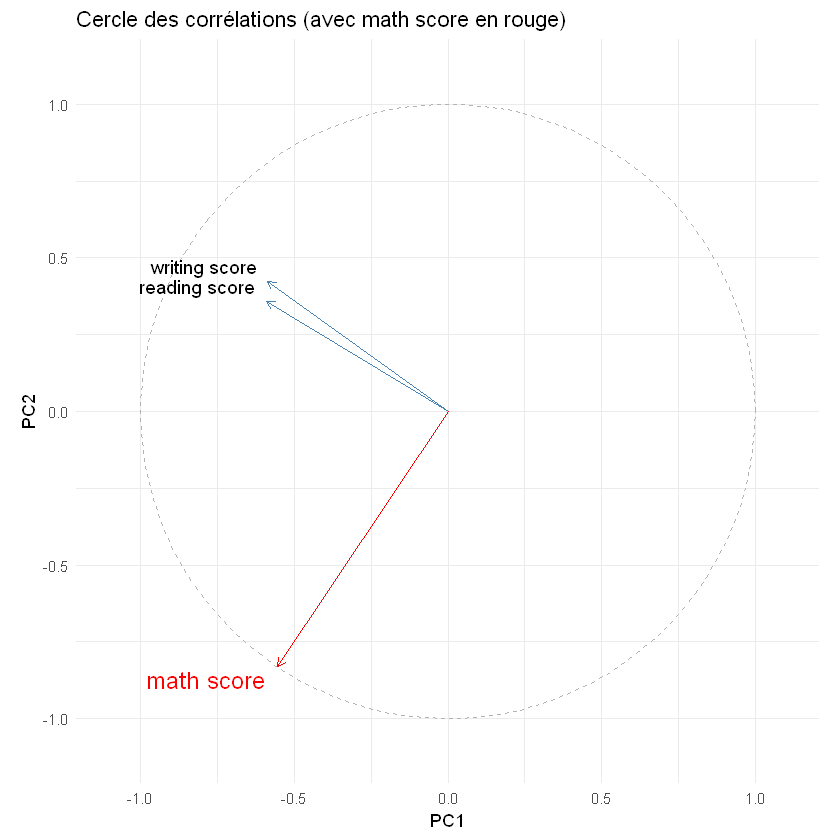

In [96]:
# Cercle des corrélations
# Coordonnées des variables
var_coord <- as.data.frame(pca_result$rotation[, 1:2])
var_coord$Variables <- rownames(var_coord)

# la Cercle des corrélations
ggplot(var_coord, aes(x = PC1, y = PC2)) +
  geom_path(
    data = data.frame(
      x = cos(seq(0, 2*pi, length.out = 100)),
      y = sin(seq(0, 2*pi, length.out = 100))
    ),
    aes(x = x, y = y),
    color = "gray70",
    linetype = "dashed"
  ) +
  geom_segment(
    aes(x = 0, y = 0, xend = PC1, yend = PC2),
    arrow = arrow(length = unit(0.2, "cm")),
    color = ifelse(var_coord$Variables == "math score", "red", "steelblue"),
    linewidth = ifelse(var_coord$Variables == "math score", 1.2, 0.7)
  ) +
  geom_text(
    aes(label = Variables),
    hjust = ifelse(var_coord$PC1 > 0, -0.1, 1.1),
    vjust = ifelse(var_coord$PC2 > 0, -0.5, 1.2),
    color = ifelse(var_coord$Variables == "math score", "red", "black"),
    size = ifelse(var_coord$Variables == "math score", 5, 4)
  ) +
  coord_fixed() +
  xlim(-1.1, 1.1) +
  ylim(-1.1, 1.1) +
  labs(title = "Cercle des corrélations (avec math score en rouge)") +
  theme_minimal()

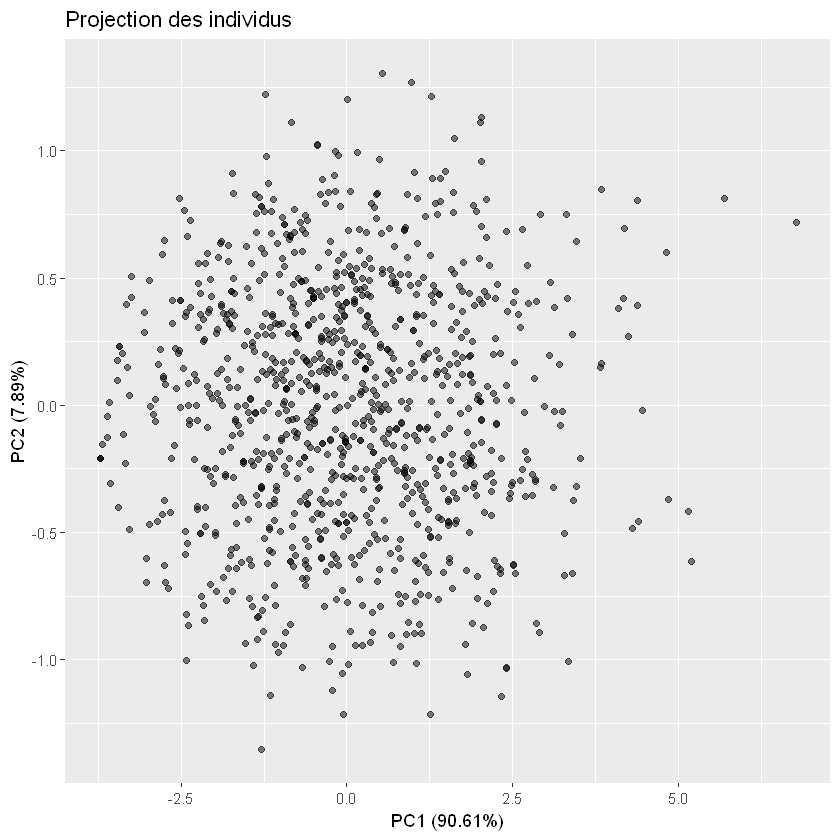

In [98]:
# Projection des individus
ind_coord <- as.data.frame(pca_result$x[, 1:2])

ggplot(ind_coord, aes(x = PC1, y = PC2)) +
  geom_point(alpha = 0.5) +
  labs(title = "Projection des individus",
       x = paste0("PC1 (", round(varexp[1]*100, 2), "%)"),
       y = paste0("PC2 (", round(varexp[2]*100, 2), "%)"))